# Analiza danych tekstowych -- wstęp

## Środowisko analityczne

Przed Wami krótkie wprowadzenie do podstwowych zadań z obszaru NLP. Wykonamy je na dostępnych danych, mało wymagającym pipelinie i dla języka angielskiego. Ale uwaga: analogiczne zadania będziecie robić dla języka polskiego (praca samodzielna, analogiczna do prezentowanej dla języka angielskiego).

Będziemy używać pakietu `spacy`, który sprawdza się przy analizie tekstu, `scikit-learn` do obliczeń i `matplotlip`, który pomoże zaprezentować dane na wykresach. Jako dane anglojęzyczne weźmiemy sobie `en_core_web_sm` --> model od SpaCy trenowany na tekstach newsów z języka angielskiego. Pierwsze zadanie dla Was: Jaki pakiet danych odpowiada za dane z języka polskiego?

Moduł `datasets` odpowiada za łatwe ładowanie danych. Dane pochodzą z [HuggingFace](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html).

In [1]:
!pip install spacy scikit-learn matplotlib datasets
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.4 MB/s eta 0:00:09
      --------------------------------------- 0.3/12.8 MB 1.6 MB/s eta 0:00:08
      --------------------------------------- 0.3/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.5/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.6/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 

In [ ]:
# Miejsce na Twój kod

## Tokenizacja

Pierwsze zadanie polega na stokenizowaniu tekstu, co oznacza ni mniej ni więcej jak podział tekstu na najmniejsze znaczące elementy, które wspólnie tworzą wyrazy tekstowe i tekst. Tokenizacja dla każdego języka jest inna, co możecie zaobserwować zestawiając dane dla języka angielskiego z danymi dla języka polskiego i porównując wyniki uzyskane na tekstach.

Tokenizacja przydaje się w życiu. Pracując na tokenach, pracujemy na uniwersalnych danych i porównujemy dane w sposób niestronniczy.

Porównajcie zdania:
"I'd like you to have some fun working with all those excercises like mice have fun with every piece of chees. It's all we need to have some fun in life."
"Chciałabym, żebyście mieli tyle zabawy z ćwiczeniami, ile ubawu mają myszy z każdym jednym kawałeczkiem sera. Wszystko, czego potrzebujemy w żyćku, to zabawa."


Wyjaśnienie:
Dowiadujemy się tu jak tokenizować tekst, a za chwilę dowiemy się, że te tokeny mogą być przetwarzane w wektory, na podstawie których możemy przewidywać kolejne wyrazy tekstowe. Jeśli jednak wynik tokenizacji nie ma być użyty bezpośrednio jako dane wejściowe sieci neuronowej, możemy użyć przyjaznej tokenizacji z pakietu `spacy`.

Zainicjujmy więc pakiet `spacy`.

In [2]:
import spacy

nlp_en = spacy.load('en_core_web_sm')

In [13]:
import spacy

nlp_pl = spacy.load('pl_core_news_sm')

Najpierw stokenizujmy tekst dla języka angielskiego:

In [3]:
text = """I'd like you to have some fun working with all those excercises like mice have fun with every piece of chees. It's all we need to have some fun in life."""

tokens_en = nlp_en(text)
[token.text for token in tokens_en]

['I',
 "'d",
 'like',
 'you',
 'to',
 'have',
 'some',
 'fun',
 'working',
 'with',
 'all',
 'those',
 'excercises',
 'like',
 'mice',
 'have',
 'fun',
 'with',
 'every',
 'piece',
 'of',
 'chees',
 '.',
 'It',
 "'s",
 'all',
 'we',
 'need',
 'to',
 'have',
 'some',
 'fun',
 'in',
 'life',
 '.']

In [17]:
text = """Chciałabym, żebyście mieli tyle zabawy z ćwiczeniami, ile ubawu mają myszy z każdym jednym kawałeczkiem sera. Wszystko, czego potrzebujemy w żyćku, to zabawa."""

tokens_pl = nlp_pl(text)
[token.text for token in tokens_pl]

['Chciałabym',
 ',',
 'żebyście',
 'mieli',
 'tyle',
 'zabawy',
 'z',
 'ćwiczeniami',
 ',',
 'ile',
 'ubawu',
 'mają',
 'myszy',
 'z',
 'każdym',
 'jednym',
 'kawałeczkiem',
 'sera',
 '.',
 'Wszystko',
 ',',
 'czego',
 'potrzebujemy',
 'w',
 'żyćku',
 ',',
 'to',
 'zabawa',
 '.']

A potem dla polskiego:
(pamiętajmy o innej nazwie zmiennych!)

A teraz podzielmy teksty na zdania.

In [4]:
[sentence.text for sentence in tokens_en.sents]

["I'd like you to have some fun working with all those excercises like mice have fun with every piece of chees.",
 "It's all we need to have some fun in life."]

In [ ]:
# Miejsce na Twój kod

### ⭐ Zadanie sprawdzające umiejętności⭐

Stwórz zdanie, które:
- zawiera skróty (USA, U.S., i.e., ww.)
- zawiera nazwy (McDonald's, Kelly's)
- zawiera czasowniki w formach warunkowych, przypuszczających (I would like, chciałabym).

```
np. We have been to U.K. before we got to the very special country, i.e. Poland.
```

In [ ]:
# Miejsce na Twój kod

## Wykrywanie kategorii morfologicznych

`spacy` można używać też do analizy kategorii morfologicznych (morfoskładniowych, zwanych też *częściami mowy*, które -- o zgrozo -- odmieniają się przez przypadki, osoby i stopnie). Tagowanie morfoskładniowe, inaczej Part-of-Speech Tagging (POS Tagging) przydaje się w bardziej zaawansowanych zadaniach, może też pozwolić na wnikliwy wgląd w właściwości tekstu.

W tym zadaniu możemy użyć tokenów (`tokens_en`) z poprzednich ćwiczeń.

In [5]:
[(token.text, token.pos_) for token in tokens_en]

[('I', 'PRON'),
 ("'d", 'AUX'),
 ('like', 'VERB'),
 ('you', 'PRON'),
 ('to', 'PART'),
 ('have', 'VERB'),
 ('some', 'DET'),
 ('fun', 'NOUN'),
 ('working', 'VERB'),
 ('with', 'ADP'),
 ('all', 'DET'),
 ('those', 'DET'),
 ('excercises', 'NOUN'),
 ('like', 'SCONJ'),
 ('mice', 'NOUN'),
 ('have', 'VERB'),
 ('fun', 'NOUN'),
 ('with', 'ADP'),
 ('every', 'DET'),
 ('piece', 'NOUN'),
 ('of', 'ADP'),
 ('chees', 'NOUN'),
 ('.', 'PUNCT'),
 ('It', 'PRON'),
 ("'s", 'AUX'),
 ('all', 'PRON'),
 ('we', 'PRON'),
 ('need', 'VERB'),
 ('to', 'PART'),
 ('have', 'VERB'),
 ('some', 'DET'),
 ('fun', 'NOUN'),
 ('in', 'ADP'),
 ('life', 'NOUN'),
 ('.', 'PUNCT')]

In [ ]:
# Miejsce na Twój kod

### ⭐ Zadanie sprawdzające umiejętności⭐

**A teraz** zobaczmy, ile i jakich tagów (w tekstach można znaleźć też określenie POS tagów) mamy w naszych przykładach. Jakie problemy mogą być poruszone przy okazji takiego zadania? Jak zrobić wykres? (Za wykres jest bonus 📊 😀)

defaultdict(<class 'int'>, {'PRON': 5, 'AUX': 2, 'VERB': 6, 'PART': 2, 'DET': 5, 'NOUN': 8, 'ADP': 4, 'SCONJ': 1, 'PUNCT': 2})


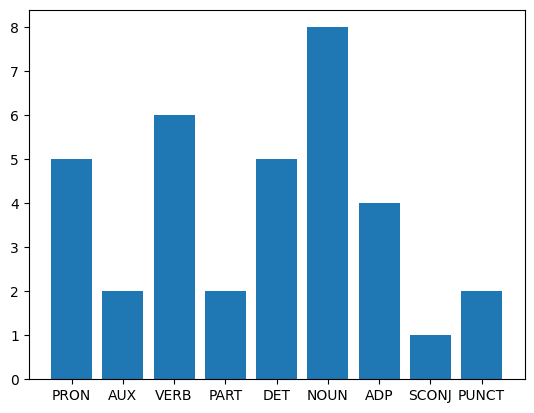

In [6]:
from collections import defaultdict

pos_quantities = defaultdict(int)
for token in tokens_en:
  pos_quantities[token.pos_] += 1
print(pos_quantities)

import matplotlib.pyplot as plt

plt.bar(list(pos_quantities.keys()), list(pos_quantities.values()))
plt.show()

Lematyzacja
Wchodzimy na kolejny poziom abstrakcji. Liczymy teraz nie tokeny, a typy. Załóżmy, że chcemy policzyć dzieci z przedszkola bawiące się głośno na placu zabaw za naszym oknem. Chcemy dowiedzieć się, kto krzyczy głośniej, dziewczynki czy chłopcy. W tym celu przyglądamy się każdemu dziecku i stwierdzamy, czy jest chłopcem czy dziewczynką. Sprowadzamy patrzenie na obiekt do binarnego wyboru płci, czasem mamy wątpliwości, co jest normalne. Możemy (z wahaniem lub bez) powiedzieć, że na placu zabaw są dwa typy dzieci: krzyczące i nie, dziewczynki i chłopcy. I podobnie jest z lematyzacją, choć trochę inaczej. Żeby zobaczyć, co jest w zdaniu, musimy przyjrzeć się okazom i stwiedzić, że jeśli w tekście dziecko drze się (jakby jutra nie było), darło się (aż do momentu, kiedy nie zagłuszyły go syreny policyjne) lub będzie się darło (do ukończenia 18 roku życia), to mówimy o jednej czynności darcia się wyrażonej jako różne formy czasownika DRZEĆ SIĘ. To jak w słowniku. Jeśli chcemy sprawdzić pisownię, szukamy czegoś co jest w mianowniku liczby pojedynczej i rodzaju męskim, albo w bezokoliczniku, albo w stopniu równym i też rodzaju męskim.

Co i kiedy liczymy? Wypisując wszystkie elementy (tokeny), liczyliśmy budulec tekstu. Wypisując lematy (typy), liczymy użycie konkretnych pojęć niezależnie od ich formy.

Jeśli chcesz policzyć, ile słów zostało wymienionych w tekście, bardzo przydatne jest sprowadzenie wszystkich słów do ich form podstawowych. Proces ten nazywany jest lematyzacją. Tekst przetworzony za pomocą spacy zawiera już lematy dla każdego tokena. Wykorzystamy tę technikę w dalszej części laboratorium.

In [8]:
[(token.text, token.lemma_) for token in tokens_en]

[('I', 'I'),
 ("'d", 'would'),
 ('like', 'like'),
 ('you', 'you'),
 ('to', 'to'),
 ('have', 'have'),
 ('some', 'some'),
 ('fun', 'fun'),
 ('working', 'work'),
 ('with', 'with'),
 ('all', 'all'),
 ('those', 'those'),
 ('excercises', 'excercise'),
 ('like', 'like'),
 ('mice', 'mouse'),
 ('have', 'have'),
 ('fun', 'fun'),
 ('with', 'with'),
 ('every', 'every'),
 ('piece', 'piece'),
 ('of', 'of'),
 ('chees', 'chee'),
 ('.', '.'),
 ('It', 'it'),
 ("'s", 'be'),
 ('all', 'all'),
 ('we', 'we'),
 ('need', 'need'),
 ('to', 'to'),
 ('have', 'have'),
 ('some', 'some'),
 ('fun', 'fun'),
 ('in', 'in'),
 ('life', 'life'),
 ('.', '.')]

In [18]:
[(token.text, token.lemma_) for token in tokens_pl]

[('Chciałabym', 'chcieć by być'),
 (',', ','),
 ('żebyście', 'żeby być'),
 ('mieli', 'mieć'),
 ('tyle', 'tyle'),
 ('zabawy', 'zabawa'),
 ('z', 'z'),
 ('ćwiczeniami', 'ćwiczenei'),
 (',', ','),
 ('ile', 'ile'),
 ('ubawu', 'ubaw'),
 ('mają', 'mieć'),
 ('myszy', 'mysz'),
 ('z', 'z'),
 ('każdym', 'każdy'),
 ('jednym', 'jeden'),
 ('kawałeczkiem', 'kawałeczkie'),
 ('sera', 'sero'),
 ('.', '.'),
 ('Wszystko', 'wszystko'),
 (',', ','),
 ('czego', 'co'),
 ('potrzebujemy', 'potrzebować'),
 ('w', 'w'),
 ('żyćku', 'żyćke'),
 (',', ','),
 ('to', 'to'),
 ('zabawa', 'zabawa'),
 ('.', '.')]

⭐ Zadanie sprawdzające umiejętności ⭐
> Dla nietypowych rzeczowników w języku angielskim:

* entities
* was
* mice
*cacti
* octopi

znajdź lematy i oceń, czy spacy rozpoznał je poprawnie. Czy możesz wskazać analogiczne przykłady dla polskiego?

In [ ]:
# Miejsce na Twój kod

## Named entity recognition

Analiza tekstu przy użyciu `spacy` może być bardziej zaawansowana (do tej pory analizowaliśmy składnię, teraz czas na odrobinę semantyki). Takim bardziej złożonym zadaniem jest rozpoznawanie encji nazwanych (NER), a więc pewnego typu obiektów, które mogą być nazwą własną, ale wcale nie muszą.

### Zatem

In [19]:
ner_result = nlp_pl("""Alina była w Warszawie i o Warszawie, ale nigdy z Warszawą.""")
[(e.text, e.label_, e.start_char, e.end_char) for e in ner_result.ents]

[('Alina', 'persName', 0, 5),
 ('Warszawie', 'placeName', 13, 22),
 ('Warszawie', 'placeName', 27, 36),
 ('Warszawą', 'placeName', 50, 58)]

Każda kategoria ma w SpaCy rozwinięcie:

In [ ]:
spacy.explain('GPE')

⭐ Zadanie sprawdzające umiejętności ⭐

> Zobacz na to samo zadanie, ale w języku polskim.



#### ⭐ Zadanie sprawdzające umiejętności ⭐

Znajdź tekst, który zawiera typ `WORK_OF_ART`.

In [ ]:
# Miejsce na Twój kod

### Obrazki
Moduł displacy odpowiada za wizualizację wyników działania NERa. Podkreślenie / wyróżnienie kolorystyczne sprawiają, że łatwiej odczytać wyniki, żeby pobieżnie je przeanalizować.

In [20]:
spacy.displacy.render(ner_result, style="ent", jupyter=True)

Korzystając z modułu `displacy` możemy też przeszukiwać informacje pod kątem jednej wybranej lub kilku pożądanych kateogrii. Żeby tego dokonać, musimy skorzystać z funkcji `displacy.render`.

In [11]:
spacy.displacy.render(ner_result, style="ent", jupyter=True, options={"ents": ["PERSON", "DATE", "GPE"]})

#### ⭐ Zadanie sprawdzające umiejętności ⭐

Spróbuj przeanalizować dłuższy tekst za pomocą `spacy` i zwizualizuj wynik NER za pomocą `displacy`. Użyj jakiegoś artykułu znalezionego w sieci.

Następnie policz ile razy każdy typ encji został wykryty w tekście i wyświetl statystyki. Dodatkowy bonus za wykres 📊 😀

In [ ]:
# Miejsce na Twój kod

## Wykrywanie podobieństwa tekstów

### Bag of words

Do tej pory analizowaliśmy problem interpretacji formy tekstu, wskazywania konkretnych struktur i przypisywania ich do specyficznej klasy. Teraz zajmiemy się problemem interpretacji znaczenia. Przyjrzyjmy się różnym tekstom i sprawdźmy, jak te teksty są do siebie podobne. Dla uproszczenia tekstem będą pojedyncze zdania.

> The quick brown fox jumps over the lazy dog.

> The dog kept barking over the night.

> A lazy fisherman with his dog met a fox last night.

Przy niedużej liczbie tekstów jesteśmy w stanie naocznie porównać próbki i określić ich podobieństwo. Czym jest owo podobieństwo? Gdybyśmy mieli scharakteryzować sposoby, na jakie teksty są podobne, jakbyśmy je określili?

Bardzo często stosowanym sposobem na znalezienie zdefiniowanego podobieństwa jest technika zwana *bag of words* (https://en.wikipedia.org/wiki/Bag-of-words_model). Polega ona na obliczeniu częstotliwości występowania słów we wszystkich tekstach, uporządkowaniu tekstu wg najpopularniejszych z nich, a następnie przedstawieniu tekstu jako listy liczb całkowitych zawierających liczbę wystąpień tych słów. Co ważne, to podejście zupełnie ignoruje

Przykład lepszy niż wykład!

Do obliczenia metryk tekstowych użyjemy modułu `sklearn`. Klasa `CountVectorizer` wykonuje wszystkie obliczenia za nas. Parametr `max_features=5` mówi wektoryzatorowi, że chcemy wybrać co najwyżej 5 najpopularniejszych tokenów ze wszystkich tekstów.


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog kept barking very loud barking and barking again over the night.",
    "A lazy fisherman with his dog met a fox last night.",
]

count_vector = CountVectorizer(max_features=10)
data_count = count_vector.fit_transform(texts)
data_count.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 1, 1, 2],
       [1, 3, 1, 0, 0, 0, 1, 1, 0, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]], dtype=int64)

OK, co oznaczają dane liczbowe, które uzyskaliśmy?

In [32]:
count_vector.get_feature_names_out()

array(['again', 'barking', 'dog', 'fox', 'lazy', 'met', 'night', 'over',
       'quick', 'the'], dtype=object)

In [ ]:
# Miejsce na Twój kod

# Tokeny dla angielskiego to:

```
[ 'barking', 'dog', 'fox', 'over', 'the']
```

z reprezentacją wektorową (`max_features=5`):

```
array([[0, 1, 1, 1, 2],
       [3, 1, 0, 1, 2],
       [0, 1, 1, 0, 0]], dtype=int64)
```

Co oznacza, że:
* słowo `barking` pojawia się w ogóle trzy razy, ale w jednym zdaniu
* słowo `dog` w każdym zdaniu po jednym razie
* słowo `fox` pojawia się raz w pierwszym i raz w trzecim tekście
* słowo `over` nie występuje w trzecim tekście
* słowo `the` pojawia się dwukrotnie w pierwszym i drugim tekście, w trzecim nie występuje wcale

Now you should understand the *bag of words* text representation. We can say that the more similar the vectors are, the more similar the texts are, too. We can obviously calculate the distance between them and even visualize them on a chart, but we need a few more exercies and obviously - more data!

#### ⭐ Zadania sprawdzające umiejętności ⭐

Przeprowadź analogiczny eksperyment dla języka polskiego i wyciągnij wnioski podobnie jak w powyższym ćwiczeniu.

Zwróć uwagę na parametr `max_features` i spróbuj zmieniać jego wartość, obserwując zmianę reprezentacji wyników. Wyciągnij wnioski na temat przełożenia wartości parametru na jakość prezentowanych wyników.

In [ ]:
# Miejsce na Twój kod

Modele typu transformers korzystają z modyfikacji tego podejścia. Więcej o rozwiązaniu problemu podobieństwa tu: https://huggingface.co/tasks/sentence-similarity.

### Stopwords

Semantyczne rozważania nad językiem prowadzą do obserwacji, że słowa nie przekazują porównywalnie istotnych informacji. Co to znaczy? W przypadku przykładu z języka angielskiego, słowo `the` mówi nam nieco mniej niż słowo `dog` czy `lazy`, a jednak to ono pojawia się w tekstach najczęściej. Nie oznacza to oczywiście, że to słowo nic nie znaczy bądź nie pełni w systemie językowym istotnej funkcji. W tym zadaniu rozpatrujemy tylko istotność słowa w przełożeniu na znaczenie całego tekstu lub grupy tekstów i przez taki pryzmat będziemy patrzeć na `stopwords`, a więc słowa popularne, budulce tekstu, nienosące znaczenia.
`Stopwords` obsługiwane są w pakiecie `SpaCy` przez moduł `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), który identyfikuje je, a następnie usuwa z reprezentacji zbioru danych.

In [33]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

list(ENGLISH_STOP_WORDS)[:100]

['in',
 'others',
 'much',
 'by',
 'be',
 'during',
 'around',
 'since',
 'such',
 'ourselves',
 'couldnt',
 'except',
 'herself',
 'two',
 'onto',
 'see',
 'already',
 'we',
 'eleven',
 'show',
 'against',
 'above',
 'herein',
 'more',
 'none',
 'is',
 'however',
 'meanwhile',
 'along',
 'interest',
 'has',
 'done',
 'either',
 'wherein',
 'still',
 'with',
 'well',
 'nothing',
 'whither',
 'which',
 'only',
 'someone',
 'me',
 'where',
 'least',
 'therefore',
 'no',
 'call',
 'hereby',
 'his',
 'thick',
 'whence',
 'due',
 'indeed',
 'four',
 'seemed',
 'do',
 'mine',
 'though',
 'if',
 'there',
 'them',
 'across',
 'cannot',
 'i',
 'cry',
 'find',
 'bill',
 'side',
 'anyone',
 'beside',
 'of',
 'us',
 'empty',
 'any',
 'thereafter',
 'whom',
 'before',
 'those',
 'ie',
 'was',
 'a',
 'always',
 'becomes',
 'ours',
 'nowhere',
 'bottom',
 'whereby',
 'becoming',
 'may',
 're',
 'almost',
 'detail',
 'thence',
 'rather',
 'nine',
 'over',
 'eight',
 'something',
 'twenty']

Nie musisz importować stopwords, aby z nich korzystać, ponieważ są one zarządzane wewnętrznie w pakiecie (`_` w nazwie pakietu).

Teraz wszystko, co musisz zrobić, to zdefiniować wbudowaną listę stopwords, których chcesz użyć przed obliczeniem wektorów.

In [ ]:
count_vector = CountVectorizer(max_features=10, stop_words = 'english')
data_count = count_vector.fit_transform(texts)
count_vector.get_feature_names_out()

### Wizualizacja danych


Wykrywanie podobnych tekstów w przypadku dużej ilości danych może stanowić wyzwanie. Zawsze pomocna jest wizualizacja danych na ekranie, więc możemy wykreślić wektory i sprawdzić, czy możemy wykryć jakieś grupy na ekranie. Będzie to trudne w przypadku trzech tekstów, na których obecnie pracujemy, ale zrozumiesz ideę.

Możemy teraz zawiesić to laboratorium i poczekać do 2048 roku, kiedy ekrany 5D będą dostępne, lub użyć popularnego algorytmu `t-SNE` do *spłaszczenia* danych, a następnie ich wizualizacji. Wybierzemy drugie rozwiązanie 😉.

Nie zagłębiając się zbytnio w działanie tego algorytmu, jest on w stanie zredukować wektory XD do wektorów YD, z X>Y, zachowując odległości między nimi. W przypadku naszego tekstu chcemy zredukować wektory 5D (5 cech tekstu) do wektorów 2D (czyli do formatu, który można wykreślić na ekranie).


In [34]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, perplexity=2)
tsne_data = tsne_model.fit_transform(data_count.toarray())

tsne_data
#data_count.toarray()

array([[-378.10602, -479.51114],
       [ 100.74497,  127.83926],
       [-666.3221 ,  237.28223]], dtype=float32)

Algortym zredukował wektory, co możemy zobaczyć, zamiast musieć sobie to wyobrażać.

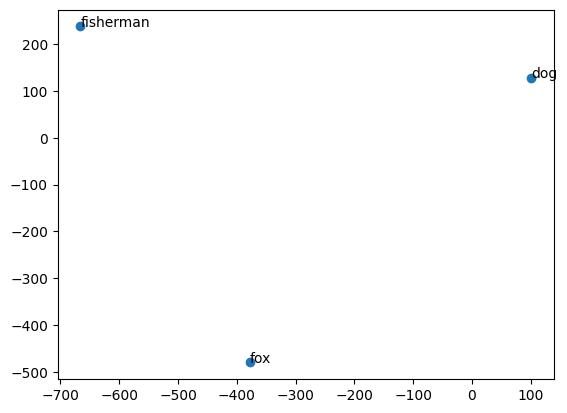

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(tsne_data[:, 0], tsne_data[:, 1])

for i, label in enumerate(["fox", "dog", "fisherman"]):
    ax.annotate(label, (tsne_data[i, 0], tsne_data[i, 1]))

plt.show()

Istnieją tylko trzy punkty danych, więc trudno powiedzieć, czy teksty można uznać za podobne do siebie, czy nie. Gdybyśmy jednak mieli znacznie więcej tekstów, moglibyśmy podejrzewać, że punkty danych utworzyłyby pewne rozróżnialne grupy, co oznacza, że teksty mówią o podobnych tematach.

## Zbiory danych

Do ostatniego zadania potrzebujemy więcej danych, żeby zaobserwować proces klasteryzacji. Jedną z możliwych dróg pozyskania danych jest skorzystanie z modułu [HuggingFace](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html) `datasets`, aby pobrać kilka tekstów, nad którymi możemy pracować.

Zobaczmy, co jest w środku.

In [37]:
import datasets
datasets.list_datasets()

C:\Users\AGH\AppData\Local\Temp\ipykernel_23112\952558115.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets.list_datasets()


['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'AI-Lab-Makerere/beans',
 'best2009',
 'Helsinki-NLP/bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blende

Zbiorów danych jest sporo, a ich liczba stale rośnie. Na potrzeby tego eksperymentu wybierzmy dowolny zbiór (zadanie nie jest tak wyspecyfikowane, by nakładać na nas konieczność wyboru wg konkretnych kryteriów).

---



In [38]:
dataset = datasets.load_dataset('ag_news', split='train')
dataset

Found cached dataset parquet (C:/Users/AGH/.cache/huggingface/datasets/parquet/ag_news-216298233d2300ec/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

Jak widzieliśmy w poprzednich przykładach, lista tekstów będzie na razie łatwiejszą strukturą do pracy. Mając powyższy zbiór danych z polami `text` i `label`, możemy utworzyć listę tekstów z prostym zrozumieniem.

In [39]:
large_texts = [item['text'] for item in dataset]
large_texts[:5]

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

## ⭐ Zadanie sprawdzające umiejętności 🗻 ⭐

Masz wszystkie narzędzia!

Zbierz duży zbiór danych tekstów z *HF* i:

1.   Przygotuj je do analizy, np.
  
  a. Stokenizuj je.

  b. Przekształć tokeny w lematy (tak, aby `dog` i `dogs` były traktowane jako ta sama funkcja).
2. Przedstaw teksty jako bag of words, pamiętając o stopwords. Eksperymentuj z liczbą cech. Jeśli okaże się, że istnieją cechy, które wpływają na reprezentację, wróć do kroku 1. i weź to pod uwagę podczas przygotowywania danych.
3. Zwizualizuj dane na wykresie (bez etykiet dla lepszej wydajności). Czy możesz wyróżnić jakieś grupy tekstów? O czym są te teksty?
4. Wykryj nazwane jednostki w reprezentantach grup. Czy nazwane jednostki sugerują również temat tekstu?


In [ ]:
# Miejsce na Twój kod